In [1]:
import time, os, math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [2]:
data_field_analytic = np.loadtxt("./analytical_field_distribution_CG.txt")
data_field_simulatd = np.loadtxt("./simulated_field_distribution_GPU_MGCG.txt")
# data_field_simulatd_2 = np.loadtxt("./simulated_field_distribution_GPU_MGCG_MIXED.txt")
# data_rho = np.loadtxt("./charge_distribution.txt")
N = data_field_simulatd.shape[0]
L = 1.0
dx = L/N
xx, yy = np.meshgrid(np.arange(N), np.arange(N))

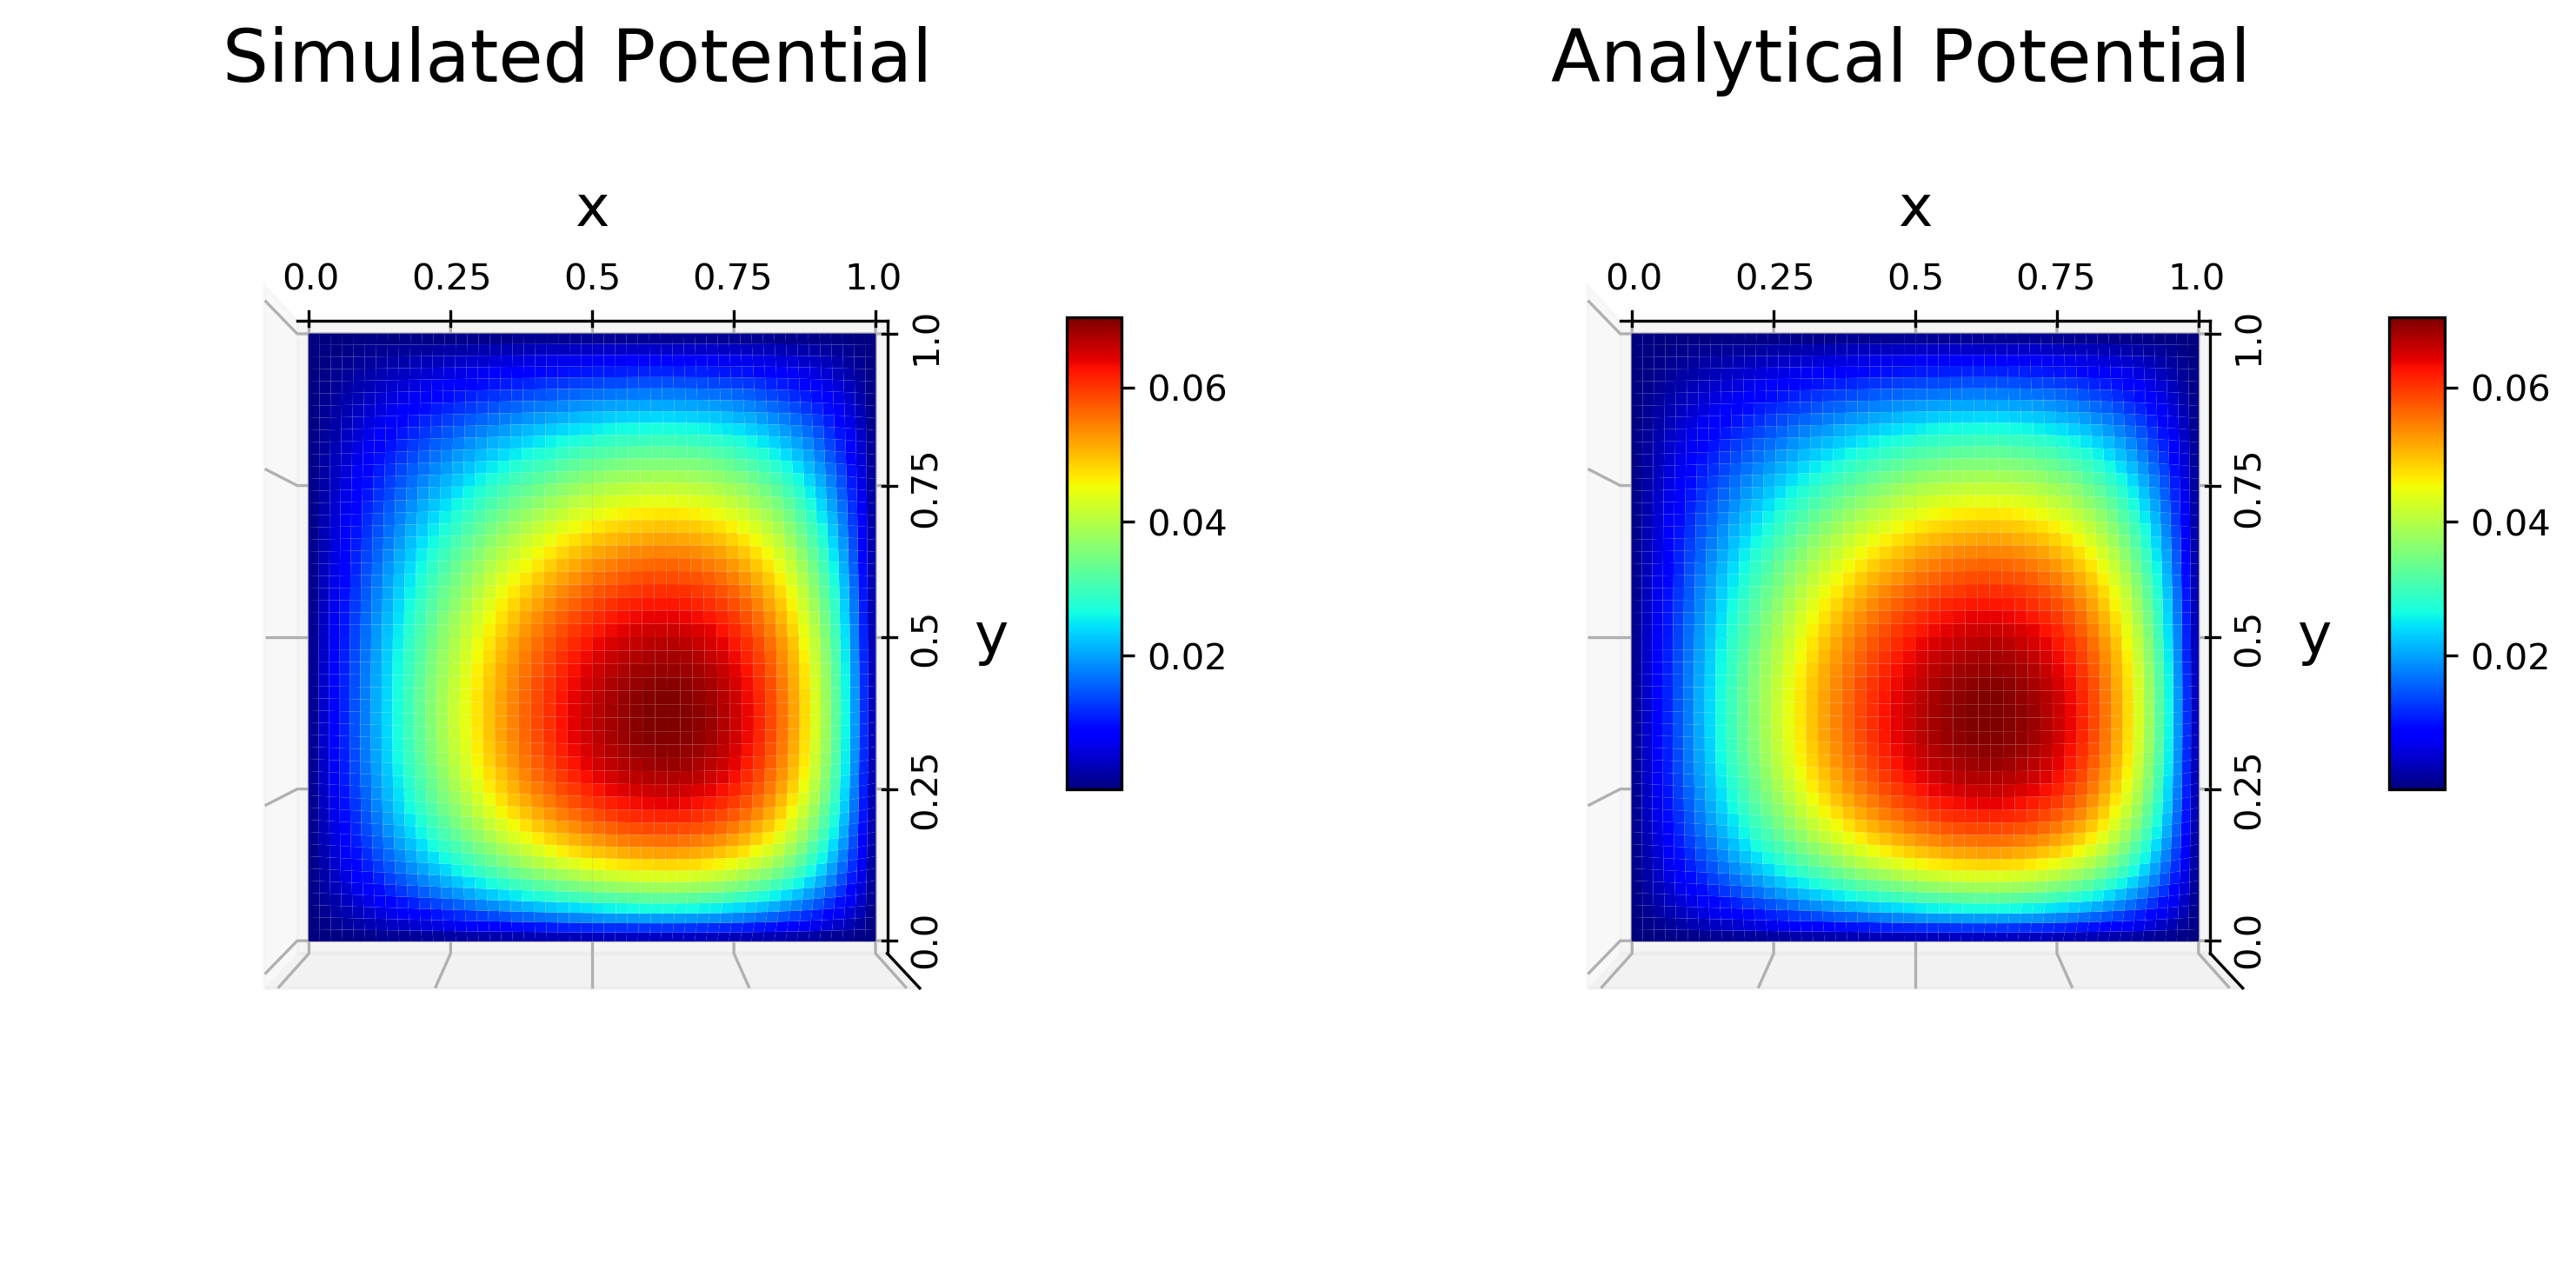

In [3]:
fig = plt.figure(figsize=(2*6,6), dpi=300)

ax_1 = fig.add_subplot(1, 2, 1, projection='3d')
# surf = ax_1.plot_surface(dx*xx, dx*yy, data_field_simulatd_2, cmap='jet', edgecolor='none', )
surf = ax_1.plot_surface(dx*xx, dx*yy, data_field_simulatd, cmap='jet', edgecolor='none', )
ax_1.set_title('Simulated Potential', fontsize=20, y=1.05)
ax_1.view_init(90,-90)
ax_1.axis('tight')
ax_1.set_xlim([0,L])
ax_1.set_ylim([0,L])
ax_1.set_xticks(np.linspace(0,L,5))
ax_1.set_yticks(np.linspace(0,L,5))
ax_1.set_xticklabels(np.linspace(0,L,5), fontsize=10., va='center')
ax_1.set_yticklabels(np.linspace(0,L,5), fontsize=10., va='center', rotation=90)
ax_1.set_zticks([])
ax_1.set_xlabel('x', labelpad=10, fontsize=16)
ax_1.set_ylabel('y', labelpad=10, fontsize=16)
axins_1 = inset_axes(ax_1,
                    width="5%",  # width = 50% of parent_bbox width
                    height="40%",  # height : 5%
                    loc='upper right',
                    bbox_to_anchor=(0.01, -0.2, 1, 1), #(position_x, position_y, bbox_size_x, bbox_size_y)
                    bbox_transform=ax_1.transAxes)
fig.colorbar(surf, shrink=0.3, aspect=10, cax=axins_1)

ax_2 = fig.add_subplot(1, 2, 2, projection='3d')
surf = ax_2.plot_surface(dx*xx, dx*yy, data_field_analytic, cmap='jet', edgecolor='none', )
ax_2.set_title('Analytical Potential', fontsize=20, y=1.05)
ax_2.view_init(90,-90)
ax_2.axis('tight')
ax_2.set_xlim([0,L])
ax_2.set_ylim([0,L])
ax_2.set_xticks(np.linspace(0,L,5))
ax_2.set_yticks(np.linspace(0,L,5))
ax_2.set_xticklabels(np.linspace(0,L,5), fontsize=10., va='center')
ax_2.set_yticklabels(np.linspace(0,L,5), fontsize=10., va='center', rotation=90)
ax_2.set_zticks([])
ax_2.set_xlabel('x', labelpad=10, fontsize=16.)
ax_2.set_ylabel('y', labelpad=10, fontsize=16.)
axins_2 = inset_axes(ax_2,
                    width="5%",  # width = 50% of parent_bbox width
                    height="40%",  # height : 5%
                    loc='upper right',
                    bbox_to_anchor=(0.01, -0.2, 1, 1), #(position_x, position_y, bbox_size_x, bbox_size_y)
                    bbox_transform=ax_2.transAxes)
fig.colorbar(surf, shrink=0.3, aspect=10, cax=axins_2)
# plt.savefig("/home/lab/Guan_Ming/Computational_Astrophysics/Homework/HW6/Simulated_v.s._Analytic_Potential_N=512_Criteria=1.00000000e-10.png", bbox_inches='tight', dpi=200, pad_inches=0.05)
plt.show()

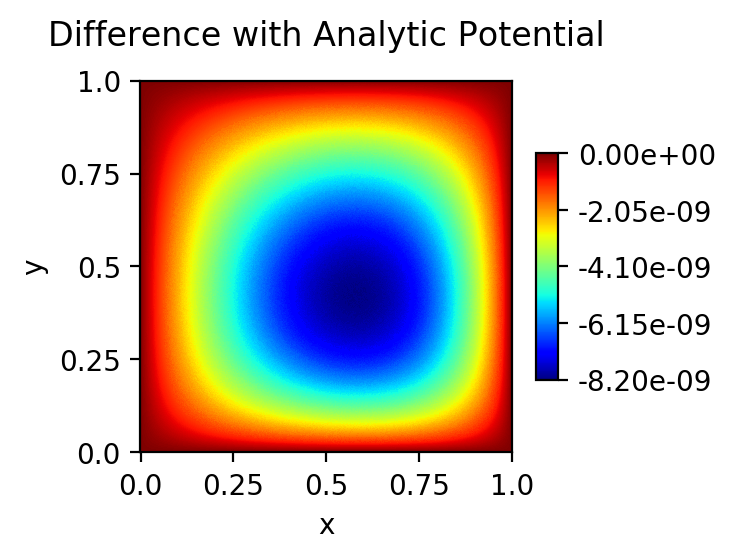

In [7]:
# difference = data_field_simulatd_2-data_field_analytic
difference = data_field_simulatd-data_field_analytic
ticks=np.linspace(difference.min(), difference.max(),5)

fig = plt.figure(figsize=(3,3), dpi=200)
ax = plt.imshow(difference[::-1,:], cmap='jet') # flip the phi to consistent with the figures above
plt.title("Difference with Analytic Potential", y=1.05)
plt.xlabel('x')
plt.ylabel('y')
plt.xticks(np.linspace(0,N,5), np.linspace(0,L,5))
plt.yticks(np.linspace(0,N,5), np.flip(np.linspace(0,L,5))) # flip the y axis
fig.colorbar(ax, shrink=0.5, aspect=10, ticks=ticks, format='%.2e')
# plt.savefig("/home/lab/Guan_Ming/Computational_Astrophysics/Homework/HW6/Simulated_v.s._Analytic_Potential_Difference_N=512_Criteria=1.00000000e-10.png", bbox_inches='tight', dpi=200, pad_inches=0.05)
plt.show()